In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#% Libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#%% Read Images
imgDancer = cv.imread('drive/MyDrive/Images/Dancer.jpeg')
imgModel = cv.imread('drive/MyDrive/Images/Model.jpg')
imgSquare = cv.imread('drive/MyDrive/Images/Square.jpeg')

<function matplotlib.pyplot.show>

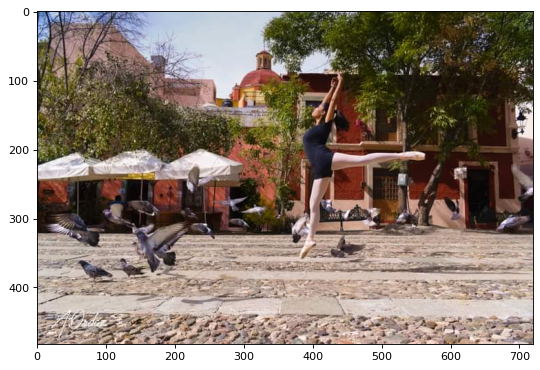

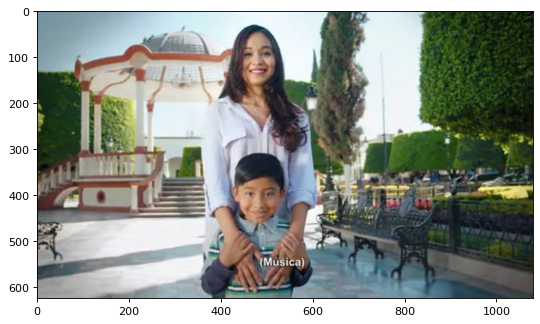

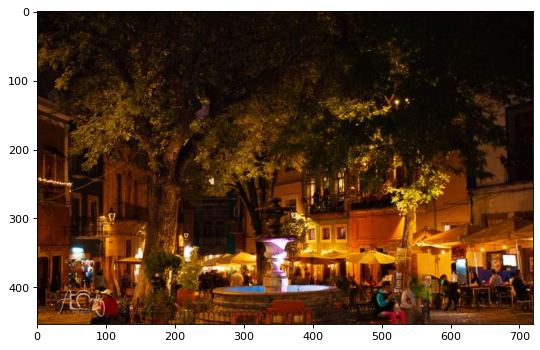

In [ ]:
# Plot the vectors in color
# Dancer
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
imgDancer = cv.cvtColor(imgDancer, cv.COLOR_BGR2RGB) # convert from BGR to RGB
plt.imshow(imgDancer)
plt.show

# Model
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
imgModel = cv.cvtColor(imgModel, cv.COLOR_BGR2RGB) # convert from BGR to RGB
plt.imshow(imgModel)
plt.show

# Square
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
imgSquare = cv.cvtColor(imgSquare, cv.COLOR_BGR2RGB) # convert from BGR to RGB
plt.imshow(imgSquare)
plt.show

In [ ]:
# make pictures into numpy array out of the image
# Dancer
dancer_array=np.array(imgDancer,dtype=np.float64)
dancer_original = dancer_array
dancer_original_value = dancer_array
#dancer_array.shape # should 3 axes array

# Model
model_array=np.array(imgModel,dtype=np.float64)
model_original = model_array
model_original_value = model_array
#model_array.shape # should 3 axes array

# Square
square_array=np.array(imgSquare,dtype=np.float64)
square_original = square_array
square_original_value = square_array
#square_array.shape # should 3 axes array

In [ ]:
# flatten out array so we have a single array with many records
# Dancer
dancer_array = dancer_array.reshape((-1, 1))
#dancer_array.shape

# Model
model_array = model_array.reshape((-1, 1))
#model_array.shape

# Square
square_array = square_array.reshape((-1, 1))
#square_array.shape

In [ ]:
# Create k-means cluster
# Dancer
dancer_kmeans = KMeans(n_clusters=10,init='random')

# Model
model_kmeans = KMeans(n_clusters=10,init='random')

# Square
square_kmeans = KMeans(n_clusters=10,init='random')

In [ ]:
# Perform Prediction
# Dancer
dancer_kmeans.fit(dancer_array)
dancer_centers = dancer_kmeans.cluster_centers_
dancer_labels = dancer_kmeans.labels_

# Model
model_kmeans.fit(model_array)
model_centers = model_kmeans.cluster_centers_
model_labels = model_kmeans.labels_

# Square
square_kmeans.fit(square_array)
square_centers = square_kmeans.cluster_centers_
square_labels = square_kmeans.labels_

In [ ]:
# Create an array for the final image
# Create a new array by assigning the cluster centers to labels so that our new array contains the predicted values
# Dancer
dancer_f = []
dancer_centers = dancer_centers.squeeze()
for i in dancer_labels:
  dancer_f.append(dancer_centers[i])
dancer_final = np.asarray(dancer_f)

# Model
model_f = []
model_centers = model_centers.squeeze()
for i in model_labels:
  model_f.append(model_centers[i])
model_final = np.asarray(model_f)

# Square
square_f = []
square_centers = square_centers.squeeze()
for i in square_labels:
  square_f.append(square_centers[i])
square_final = np.asarray(square_f)

In [ ]:
# recreate the dimensions of our original image
# RGB here

# Dancer
dancer_reduced_value = dancer_final
dancer_final = dancer_final.reshape(dancer_original.shape)

R_Original_Dancer = imgDancer[:,:,0].flatten()
G_Original_Dancer = imgDancer[:,:,1].flatten()
B_Original_Dancer = imgDancer[:,:,2].flatten()

R_Reduced_Dancer = dancer_final[:,:,0].flatten()
G_Reduced_Dancer = dancer_final[:,:,1].flatten()
B_Reduced_Dancer = dancer_final[:,:,2].flatten()

# Model
model_reduced_value = model_final
model_final = model_final.reshape(model_original.shape)

R_Original_Model = imgModel[:,:,0].flatten()
G_Original_Model = imgModel[:,:,1].flatten()
B_Original_Model = imgModel[:,:,2].flatten()

R_Reduced_Model = model_final[:,:,0].flatten()
G_Reduced_Model = model_final[:,:,1].flatten()
B_Reduced_Model = model_final[:,:,2].flatten()

# Square
square_reduced_value = square_final
square_final = square_final.reshape(square_original.shape)

R_Original_Square = imgSquare[:,:,0].flatten()
G_Original_Square = imgSquare[:,:,1].flatten()
B_Original_Square = imgSquare[:,:,2].flatten()

R_Reduced_Square = square_final[:,:,0].flatten()
G_Reduced_Square = square_final[:,:,1].flatten()
B_Reduced_Square = square_final[:,:,2].flatten()

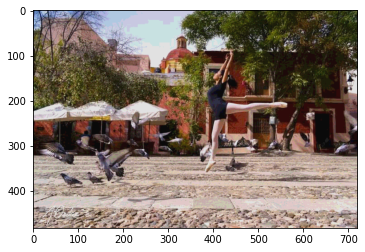

RMSE: Dancer 92.66180919434044


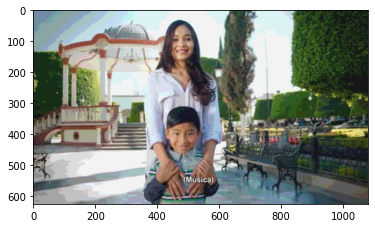

RMSE: Model 71.86100357590972


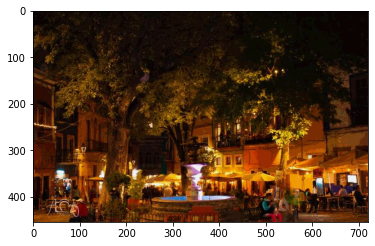

RMSE: Square 84.70296545941333


In [ ]:
# View the image
# Dancer
dancer_final = dancer_final/255
plt.imshow(dancer_final)
plt.show()

# RMSE for Dancer
MSE_Dancer = np.mean(np.square(R_Reduced_Dancer-R_Original_Dancer)**2 + (G_Reduced_Dancer-G_Original_Dancer)**2 + (B_Reduced_Dancer-B_Original_Dancer)**2)
RMSE_Dancer = np.sqrt(MSE_Dancer)
print(f'RMSE: Dancer {RMSE_Dancer}')

# Model
model_final = model_final/255
plt.imshow(model_final)
plt.show()

# RMSE for Model
MSE_Model = np.mean(np.square(R_Reduced_Model-R_Original_Model)**2 + (G_Reduced_Model-G_Original_Model)**2 + (B_Reduced_Model-B_Original_Model)**2)
RMSE_Model = np.sqrt(MSE_Model)
print(f'RMSE: Model {RMSE_Model}')

# Square
square_final = square_final/255
plt.imshow(square_final)
plt.show()

# RMSE for Square
MSE_Square = np.mean(np.square(R_Reduced_Square-R_Original_Square)**2 + (G_Reduced_Square-G_Original_Square)**2 + (B_Reduced_Square-B_Original_Square)**2)
RMSE_Square = np.sqrt(MSE_Square)
print(f'RMSE: Square {RMSE_Square}')